In [55]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Name of the CSV file
sunlight = "data_sets/us_ave_annual_sunshine.csv"
temperature = "data_sets/us_ave_annual_temp.csv"
precipitation = "data_sets/us_ave_annual_precipitation.csv"
humidity = "data_sets/us_ave_annual_humidity.csv"
happiness = "data_sets/us_happy.csv"

In [57]:
# The correct encoding must be used to read the CSV in pandas
sunlight_df = pd.read_csv(sunlight)
temperature_df = pd.read_csv(temperature)
precipitation_df = pd.read_csv(precipitation)
humidity_df = pd.read_csv(humidity)
happiness_df = pd.read_csv(happiness)

In [58]:
# Preview of the Sunlight DataFrame
# sunlight_df.head()
sun_df = pd.DataFrame(sunlight_df[["State","% Sun","Total Hours","Clear Days"]])
sun_df = sun_df.rename(columns={"Total Hours": "Total Sunlight Hours"})
sun_df = sun_df.sort_values("Total Sunlight Hours", ascending=False)
sun_df.head()
# sun_df.count()
# sun_df.dtypes

,State,% Sun,Total Sunlight Hours,Clear Days
47,West Virginia,–,–,60
7,Delaware,–,–,97
10,Hawaii,71,–,90
2,Arizona,85,3806,193
27,Nevada,79,3646,158


In [59]:
# Preview of the Cloudy DataFrame
# sunlight_df.head()
cloudy1_df = sun_df
cloudy2_df = cloudy1_df
# Create a new column that finds the average number of cloudy days with >30% cloud coverage during the day
cloudy1_df["Cloudy Days (>30% Cloud Coverage)"] = 365 - sun_df['Clear Days']
# Create a new column that finds the % of Cloudy Days
cloudy2_df["% of Cloudy Days"] = (round(cloudy1_df["Cloudy Days (>30% Cloud Coverage)"]/365*100,2))
# Create Cloudy Data Frame with the two new columns
cloudy_df = pd.DataFrame(cloudy2_df[["State","% of Cloudy Days","Cloudy Days (>30% Cloud Coverage)"]])
cloudy_df = cloudy_df.sort_values("% of Cloudy Days", ascending=False)
cloudy_df.head()
# cloudy_df.count()
# cloudy_df.dtypes

,State,% of Cloudy Days,Cloudy Days (>30% Cloud Coverage)
44,Vermont,84.11,307
46,Washington,84.11,307
47,West Virginia,83.56,305
1,Alaska,83.29,304
31,New York,82.74,302


In [60]:
# Preview of the Temperature Report DataFrame
# temperature_df.head()
temp_df = pd.DataFrame(temperature_df[["State","Rank","Avg °F"]])
temp_df = temp_df.rename(columns={"Avg °F": "Avg Temp (°F)","Rank":"Avg Temp Rank"})
temp_df = temp_df.sort_values("Avg Temp Rank", ascending=True)
temp_df.head()
# temp_df.count()
# temp_df.dtypes

,State,Avg Temp Rank,Avg Temp (°F)
8,Florida,1,70.7
10,Hawaii,2,70.0
17,Louisiana,3,66.4
42,Texas,4,64.8
9,Georgia,5,63.5


In [61]:
# Preview of the Precipitation DataFrame
# precipitation_df.head()
prec_df = pd.DataFrame(precipitation_df[["State","Rank","Inches"]])
prec_df = prec_df.rename(columns={"Inches": "Precipitation (In Inches)","Rank":"Precipitation Rank"})
prec_df = prec_df.sort_values("Precipitation Rank", ascending=True)
prec_df.head()
# prec_df.count()
# prec_df.dtypes

,State,Precipitation Rank,Precipitation (In Inches)
10,Hawaii,1,63.7
17,Louisiana,2,60.1
23,Mississippi,3,59.0
0,Alabama,4,58.3
8,Florida,5,54.5


In [62]:
# Preview of the Humidity DataFrame
#humidity_df.head()
hum1_df = pd.DataFrame(humidity_df[["State","Morning","Afternoon"]])
hum1_df = hum1_df.rename(columns={"Morning": "Morning Humidity","Afternoon":"Afternoon Humidity"})
# Create a new column that finds the average humidity for the day
hum2_df = hum1_df
hum2_df["Avg Humidity %"] = ((hum1_df["Morning Humidity"] + hum1_df["Afternoon Humidity"])/2)
humid_df = pd.DataFrame(hum2_df[["State","Avg Humidity %"]])
humid_df = humid_df.sort_values("Avg Humidity %", ascending=False)
humid_df.head()
# humid_df.count()
# humid_df.dtypes

,State,Avg Humidity %
17,Louisiana,74.0
21,Michigan,72.5
23,Mississippi,72.5
46,Washington,72.5
8,Florida,72.0


In [63]:
# Preview of the Happy DataFrame
# happiness_df.head()
happy_df = pd.DataFrame(happiness_df[["State","Happiness Rank 2018","Happiness Score 2018","Latitude","Longitude",]])
happy_df = happy_df.rename(columns={"Happiness Rank 2018": "Happiness Rank","Happiness Score 2018":"Happiness Score"})
happy_df.head()
# happy_df.count()
# happy_df.dtypes

,State,Happiness Rank,Happiness Score,Latitude,Longitude
0,Hawaii,1,68.27,19.898682,-155.665857
1,Utah,2,67.84,39.320980,-111.093731
2,Minnesota,3,67.26,46.729553,-94.685900
3,North Dakota,4,65.62,47.551493,-101.002012
4,California,5,63.14,36.778261,-119.417932


In [64]:
# Merge the US Happy DataFrame with the Weather DataFrames
ushappyweather1_df = pd.merge(happy_df, temp_df, on="State", how="inner")
ushappyweather1_df = ushappyweather1_df[["State","Happiness Rank","Happiness Score",
                                         "Avg Temp Rank","Avg Temp (°F)","Latitude","Longitude"]]
ushappyweather1_df.head()
# ushappyweather1_df.count()

,State,Happiness Rank,Happiness Score,Avg Temp Rank,Avg Temp (°F),Latitude,Longitude
0,Hawaii,1,68.27,2,70.0,19.898682,-155.665857
1,Utah,2,67.84,32,48.6,39.320980,-111.093731
2,Minnesota,3,67.26,47,41.2,46.729553,-94.685900
3,North Dakota,4,65.62,49,40.4,47.551493,-101.002012
4,California,5,63.14,12,59.4,36.778261,-119.417932


In [65]:
# Merge the DataFrame
ushappyweather2_df = pd.merge(ushappyweather1_df, sun_df, on="State", how="inner")
ushappyweather2_df = ushappyweather2_df[["State","Happiness Rank","Happiness Score",
                                        "Avg Temp Rank","Avg Temp (°F)",
                                         "% Sun","Total Sunlight Hours","Clear Days",
                                         "Cloudy Days (>30% Cloud Coverage)", "% of Cloudy Days",
                                         "Latitude","Longitude"]]
ushappyweather2_df.head()
# ushappyweather2_df.count()

,State,Happiness Rank,Happiness Score,Avg Temp Rank,Avg Temp (°F),% Sun,Total Sunlight Hours,Clear Days,Cloudy Days (>30% Cloud Coverage),% of Cloudy Days,Latitude,Longitude
0,Hawaii,1,68.27,2,70.0,71,–,90,275,75.34,19.898682,-155.665857
1,Utah,2,67.84,32,48.6,66,3029,125,240,65.75,39.320980,-111.093731
2,Minnesota,3,67.26,47,41.2,58,2711,95,270,73.97,46.729553,-94.685900
3,North Dakota,4,65.62,49,40.4,59,2738,93,272,74.52,47.551493,-101.002012
4,California,5,63.14,12,59.4,68,3055,146,219,60.00,36.778261,-119.417932


In [66]:
# Merge the DataFrame
ushappyweather3_df = pd.merge(ushappyweather2_df, prec_df, on="State", how="inner")
ushappyweather3_df = ushappyweather3_df[["State","Happiness Rank","Happiness Score",
                                        "Avg Temp Rank","Avg Temp (°F)",
                                         "% Sun","Total Sunlight Hours","Clear Days",
                                         "Cloudy Days (>30% Cloud Coverage)", "% of Cloudy Days",
                                         "Precipitation Rank","Precipitation (In Inches)",
                                         "Latitude","Longitude"]]
ushappyweather3_df.head()
# ushappyweather3_df.count()

,State,Happiness Rank,Happiness Score,Avg Temp Rank,Avg Temp (°F),% Sun,Total Sunlight Hours,Clear Days,Cloudy Days (>30% Cloud Coverage),% of Cloudy Days,Precipitation Rank,Precipitation (In Inches),Latitude,Longitude
0,Hawaii,1,68.27,2,70.0,71,–,90,275,75.34,1,63.7,19.898682,-155.665857
1,Utah,2,67.84,32,48.6,66,3029,125,240,65.75,49,12.2,39.320980,-111.093731
2,Minnesota,3,67.26,47,41.2,58,2711,95,270,73.97,37,27.3,46.729553,-94.685900
3,North Dakota,4,65.62,49,40.4,59,2738,93,272,74.52,43,17.8,47.551493,-101.002012
4,California,5,63.14,12,59.4,68,3055,146,219,60.00,40,22.2,36.778261,-119.417932


In [67]:
# Merge the DataFrame
ushappyweather4_df = pd.merge(ushappyweather3_df, humid_df, on="State", how="left")
ushappyweather4_df = ushappyweather4_df[["State","Happiness Rank","Happiness Score",
                                        "Avg Temp Rank","Avg Temp (°F)",
                                         "% Sun","Total Sunlight Hours","Clear Days",
                                         "Cloudy Days (>30% Cloud Coverage)", "% of Cloudy Days",
                                         "Precipitation Rank","Precipitation (In Inches)",
                                         "Avg Humidity %","Latitude","Longitude"]]
ushappyweather4_df.head()
# ushappyweather4_df.count()

,State,Happiness Rank,Happiness Score,Avg Temp Rank,Avg Temp (°F),% Sun,Total Sunlight Hours,Clear Days,Cloudy Days (>30% Cloud Coverage),% of Cloudy Days,Precipitation Rank,Precipitation (In Inches),Avg Humidity %,Latitude,Longitude
0,Hawaii,1,68.27,2,70.0,71,–,90,275,75.34,1,63.7,63.5,19.898682,-155.665857
1,Utah,2,67.84,32,48.6,66,3029,125,240,65.75,49,12.2,55.0,39.320980,-111.093731
2,Minnesota,3,67.26,47,41.2,58,2711,95,270,73.97,37,27.3,66.5,46.729553,-94.685900
3,North Dakota,4,65.62,49,40.4,59,2738,93,272,74.52,43,17.8,65.5,47.551493,-101.002012
4,California,5,63.14,12,59.4,68,3055,146,219,60.00,40,22.2,69.0,36.778261,-119.417932


In [68]:
#Save File
ushappyweather2_df.to_csv("data_sets/us_happy_weather_merged.csv")
ushappyweather4_df.to_csv("data_sets/us_happy_weather_merged_with_precip_and_humid.csv")

In [69]:
#Chart Data Frame Base 
chart_df = ushappyweather2_df[["State","Happiness Rank","Avg Temp (°F)",
                                        "% Sun","% of Cloudy Days"]] 
chart_df.head()



,State,Happiness Rank,Avg Temp (°F),% Sun,% of Cloudy Days
0,Hawaii,1,70.0,71,75.34
1,Utah,2,48.6,66,65.75
2,Minnesota,3,41.2,58,73.97
3,North Dakota,4,40.4,59,74.52
4,California,5,59.4,68,60.00


In [70]:
#Top 10 States from Happiness Report
top10us_df = chart_df.nsmallest(10, "Happiness Rank")
top10us_df

,State,Happiness Rank,Avg Temp (°F),% Sun,% of Cloudy Days
0,Hawaii,1,70.0,71,75.34
1,Utah,2,48.6,66,65.75
2,Minnesota,3,41.2,58,73.97
3,North Dakota,4,40.4,59,74.52
4,California,5,59.4,68,60.00
5,Idaho,6,44.4,64,67.12
6,Maryland,7,54.2,57,71.23
7,Iowa,8,47.8,59,71.23
8,South Dakota,9,45.2,63,71.51
9,Nebraska,10,48.8,61,67.95


In [71]:
#Bottom 10 States from Happiness Report
bot10us_df = chart_df.nlargest(10, "Happiness Rank")
bot10us_df

,State,Happiness Rank,Avg Temp (°F),% Sun,% of Cloudy Days
49,West Virginia,50,51.8,–,83.56
48,Arkansas,49,60.4,61,66.30
47,Louisiana,48,66.4,57,72.33
46,Alaska,47,26.6,41,83.29
45,Oklahoma,46,59.6,68,61.92
44,Alabama,45,62.8,58,72.88
43,Kentucky,44,55.6,56,74.52
42,Mississippi,43,63.4,61,69.59
41,Missouri,42,54.5,60,68.49
40,New Mexico,41,53.4,76,54.25


In [72]:
mid10us_df = chart_df.loc[(chart_df["Happiness Rank"] >= 20) &
                         (chart_df["Happiness Rank"] < 30)]   
mid10us_df

,State,Happiness Rank,Avg Temp (°F),% Sun,% of Cloudy Days
19,North Carolina,20,59.0,60,70.14
20,Arizona,21,60.3,85,47.12
21,Texas,22,64.8,61,63.01
22,Illinois,23,51.8,56,73.97
23,New Hampshire,24,43.8,54,75.34
24,Kansas,25,54.3,65,64.93
25,Nevada,26,49.9,79,56.71
26,Delaware,27,55.3,–,73.42
27,Montana,28,42.7,59,77.53
28,Florida,29,70.7,66,72.33


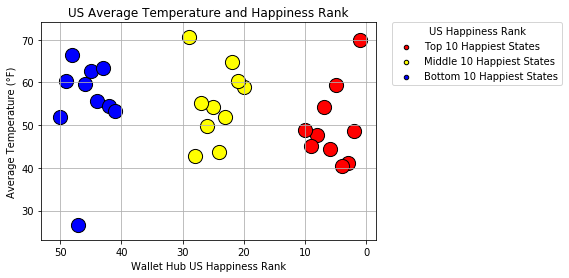

In [73]:
#scatterplot for temp and happiness rank
plt.scatter(top10us_df["Happiness Rank"], top10us_df["Avg Temp (°F)"], facecolors="red", edgecolors="black", s=200)
plt.scatter(mid10us_df['Happiness Rank'], mid10us_df["Avg Temp (°F)"], facecolors="yellow", edgecolors="black", s=200 )
plt.scatter(bot10us_df['Happiness Rank'], bot10us_df["Avg Temp (°F)"], facecolors="blue", edgecolors="black", s=200 )

# Incorporate the other graph properties
plt.title("US Average Temperature and Happiness Rank")
plt.xlabel("Wallet Hub US Happiness Rank")
plt.ylabel("Average Temperature (°F)")

plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend (('Top 10 Happiest States', 'Middle 10 Happiest States', 'Bottom 10 Happiest States'),
                     title = "US Happiness Rank",scatterpoints = 1,
                    bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]


plt.grid(True)

plt.savefig("Images/US_Happiness_Temp.png")

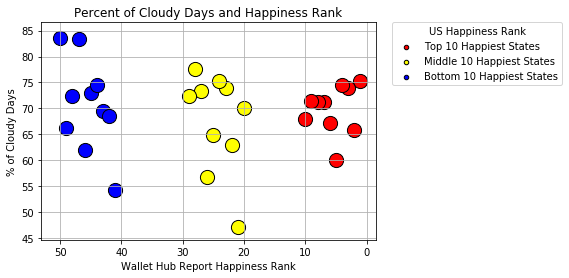

In [74]:
#scatterplot for Cloudy and Happiness Rank

plt.scatter(top10us_df["Happiness Rank"], top10us_df["% of Cloudy Days"], facecolors="red", edgecolors="black", s=200)
plt.scatter(mid10us_df['Happiness Rank'], mid10us_df["% of Cloudy Days"], facecolors="yellow", edgecolors="black", s=200 )
plt.scatter(bot10us_df['Happiness Rank'], bot10us_df["% of Cloudy Days"], facecolors="blue", edgecolors="black", s=200 )

plt.grid()

# Incorporate the other graph properties
plt.title("Percent of Cloudy Days and Happiness Rank")
plt.xlabel("Wallet Hub Report Happiness Rank")
plt.ylabel("% of Cloudy Days")

plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend (('Top 10 Happiest States', 'Middle 10 Happiest States', 'Bottom 10 Happiest States'),
                     title = "US Happiness Rank",scatterpoints = 1,
                    bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]


plt.grid(True)

plt.savefig("Images/US_Happiness_Cloudy.png")

In [75]:
#Import and Read csv file
sunlight1 = "data_sets/us_ave_annual_sunshine1.csv"
sunlight1_df = pd.read_csv(sunlight1)
# Preview of the Sunlight1 DataFrame
# sunlight1_df.head()
sun1_df = pd.DataFrame(sunlight1_df[["State","% Sun"]])
sun1_df = sun1_df.sort_values("% Sun", ascending=False)
sun1_df.head()
# sun1_df.count()
# sun1_df.dtypes

,State,% Sun
2,Arizona,85
26,Nevada,79
29,New Mexico,76
9,Hawaii,71
5,Colorado,71


In [86]:
#Merge Tables
chart2_df = pd.merge(happy_df, sun1_df, on="State", how="inner")
chart2_df = pd.DataFrame(chart2_df[["State","Happiness Rank","% Sun"]])
chart2_df.head()

,State,Happiness Rank,% Sun
0,Hawaii,1,71
1,Utah,2,66
2,Minnesota,3,58
3,North Dakota,4,59
4,California,5,68


In [83]:
stop10us_df = chart2_df.nsmallest(10, "Happiness Rank")
stop10us_df

,State,Happiness Rank,% Sun
0,Hawaii,1,71
1,Utah,2,66
2,Minnesota,3,58
3,North Dakota,4,59
4,California,5,68
5,Idaho,6,64
6,Maryland,7,57
7,Iowa,8,59
8,South Dakota,9,63
9,Nebraska,10,61


In [84]:
sbot10us_df = chart2_df.nlargest(10, "Happiness Rank")
sbot10us_df

,State,Happiness Rank,% Sun
47,Arkansas,49,61
46,Louisiana,48,57
45,Alaska,47,41
44,Oklahoma,46,68
43,Alabama,45,58
42,Kentucky,44,56
41,Mississippi,43,61
40,Missouri,42,60
39,New Mexico,41,76
38,Tennessee,40,56


In [85]:
smid10us_df = chart2_df.loc[(chart_df["Happiness Rank"] >= 20) &
                         (chart_df["Happiness Rank"] < 30)]   
smid10us_df

,State,Happiness Rank,% Sun
19,North Carolina,20,60
20,Arizona,21,85
21,Texas,22,61
22,Illinois,23,56
23,New Hampshire,24,54
24,Kansas,25,65
25,Nevada,26,79
26,Montana,28,59
27,Florida,29,66
28,Pennsylvania,30,58


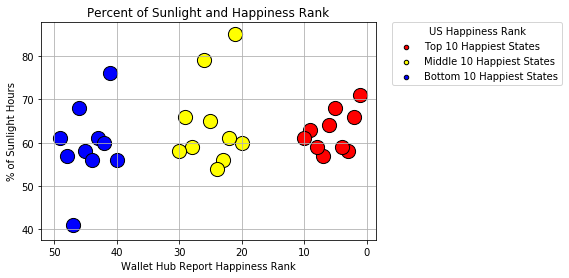

In [88]:
#scatterplot for Sunlight and Happiness Rank

plt.scatter(stop10us_df["Happiness Rank"], stop10us_df["% Sun"], facecolors="red", edgecolors="black", s=200)
plt.scatter(smid10us_df['Happiness Rank'], smid10us_df["% Sun"], facecolors="yellow", edgecolors="black", s=200 )
plt.scatter(sbot10us_df['Happiness Rank'], sbot10us_df["% Sun"], facecolors="blue", edgecolors="black", s=200 )

plt.grid()

# Incorporate the other graph properties
plt.title("Percent of Sunlight and Happiness Rank")
plt.xlabel("Wallet Hub Report Happiness Rank")
plt.ylabel("% of Sunlight Hours")

plt.gca().invert_xaxis()

# Create a legend
legend = plt.legend (('Top 10 Happiest States', 'Middle 10 Happiest States', 'Bottom 10 Happiest States'),
                     title = "US Happiness Rank",scatterpoints = 1,
                    bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)

legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]


plt.grid(True)

plt.savefig("Images/US_Happiness_Sun.png")